# Introduction to Machine Learning in Python
The pupose of this notebook is to introduce you to some basic concepts and techniques for machine learning in Python. 

**This notebook will cover:**
1. Setting up JupyterNotebook and importing libraries
2. The dataset used in this notebook
3. Reading files into a pandas DataFrame
3. Looking closer at data in the read file using pands built-in functionality and python basics
5. Vizualizing data using matplotlib and seaborn
6. Wrangling data
7. Bonus: Intro to Scikit-learn

## Prerequisites for using Jupyter Notebook
I recommend installing [Anaconda](https://www.anaconda.com/download). This enables you to run a JupyterNotebook on your local computer in the browser and manage Python libraries. There are alternative solutions but this get you up and running very quickly.

* Once installed, navigate to `Home` and click on the `Launch` button for the `JupyterNotebook` application. This will open a new tab in your browser.
* Navigate to this file in your folder stucture and double click it, this should open a new tab in your browser.
* Now you are good to go.


## Importing necessary libraries, and reading data
Before diving into the details we start by importing the necessary Python libraries for this training. Click the respective library names for further information.

> | Library | Description |
> | --- | --- |
> | [random](https://docs.python.org/3/library/random.html) | for random number generation |
> | [pandas](https://pandas.pydata.org/) | for data manipulation and analysis (dataframes) |
> | [numpy](https://numpy.org/) | for numerical operations |
> | [matplotlib](https://matplotlib.org/) | visualization with Python |
> | [scikit-learn](https://scikit-learn.org/stable/) | machine learning in Python |
> | [seaborn](https://seaborn.pydata.org/) | statistical data visualization |

This line of code installs all necessary python libraries from the requirements.txt file.

In [581]:
!pip install -r ../requirements.txt

In [582]:
# Each library is imported as "short_name" to enables shorter reference names later, e.g., random is imported as rd
import random as rd
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns # Add to importing libraries table

# The Dataset used in this notebook

In this notebook we will utilize the [Titanic - Machine Learning from Disaster dataset](https://www.kaggle.com/c/titanic/data) available on kaggle. These are available in the *02_Dataset* folder. The dataset is split into two groups:
1. The training dataset, train.csv, which should be used to build your ML models.
2. The test dataset, test.csv, whihc should be used to evaluate your ML models.

**Both datasets contains information about passengers on the Titanic**, in addition to passenger traits such as name, the training dataset contains information about if the passenger survived or not. For an in depth walkthrough of the dataset please visit the provided link above. In short the datasets contins the following attributes for each passanger:

> | Variable | Definition | Key |
> | --- | --- | --- |
> | survival | Survival	| 0 = No, 1 = Yes |
> | pclass | Ticket class | 1 = 1st, 2 = 2nd, 3 = 3rd |
> | sex	| Sex | |
> | Age	| Age in years | |	
> | sibsp |	# of siblings / spouses aboard the Titanic | |
> | parch | # of parents / children aboard the Titanic | |
> | ticket | Ticket number | |	
> | fare | Passenger fare | |	
> | cabin | Cabin number | |	
> | embarked | Port of Embarkation | C = Cherbourg, Q = Queenstown, S = Southampton |



# Loading csv-files into pandas dataframes

We will read our two csv-files into a pandas dataframe. This is the first step in getting to know the data. 

Create two dataframe objects named *df_test* and *df_train* by calling the *read_csv* method of the pandas library. Use the PassengerId as the index

In [583]:
#?pd.read_csv

In [584]:
dataset_filepath = "../02_Dataset/"

In [585]:
df_test = pd.read_csv(f"{dataset_filepath}test.csv",index_col=0)
df_train = pd.read_csv(f"{dataset_filepath}train.csv", index_col=0)

In [586]:
df_train

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S


In [587]:
#Make sure it looks good
print(f'{len(df_test.columns)} columns and {len(df_train)} rows in the test dataset.')
print(f'{len(df_train.columns)} columns and {len(df_test)} rows in the train dataset.')

10 columns and 891 rows in the test dataset.
11 columns and 418 rows in the train dataset.


# Investigating the data
Investigating the data, understanding it and thinking about what we could do with it is the first step in the feature selection process

## Printing

Printing is very easy in python using the function *print*. Below we are creating a string *str*. Add code to print it

In [588]:
str = "Machine learning rocks!"
print(str)

Machine learning rocks!


However, you don't need to always use print when using a jupyter notebook or some sort of IDE. 

In [589]:
str

'Machine learning rocks!'

Python offers f-strings which allow us to combine a regular string with expressions and variables.

In [590]:
# Inside {} we can but expressions and variables, an typing f'' or f"" results in an f-string.
f_str = f'{len(df_test.columns)} columns and {len(df_train)} rows in the test dataset.'
print(f_str)
print(f'{len(df_train.columns)} columns and {len(df_test)} rows in the train dataset.')

10 columns and 891 rows in the test dataset.
11 columns and 418 rows in the train dataset.


## Understanding the data in our dataframes
We will now try to select data from the dataframes in different ways in order to understand it better. Dataframes in pandas comes with various methods, such as the `map()` function which enable us to apply a function to every element in a df. Refer to the [pandas documentation](https://pandas.pydata.org/) for a full list of the available methods.

In [591]:
df_train # Maybe a bit too long

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S


> 🤔 **Problem 1: Using the head and tail pandas methods**
>
> Use the `pd.df.head()` and `pd.df.tail()` methods to print some data without getting a massive list. Alter the expression to print 3 or 10 elements of the list. If you want to know more about a pandas methods simply run `?pd.DataFrame.method_name`, e.g., "?pd.DataFrame.head".

In [592]:
df_train.head(3) # Select only the first 3

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S


In [593]:
df_train.tail(10) # Select last 10

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
882,0,3,"Markun, Mr. Johann",male,33.0,0,0,349257,7.8958,NaN,S
883,0,3,"Dahlberg, Miss. Gerda Ulrika",female,22.0,0,0,7552,10.5167,NaN,S
884,0,2,"Banfield, Mr. Frederick James",male,28.0,0,0,C.A./SOTON 34068,10.5000,NaN,S
885,0,3,"Sutehall, Mr. Henry Jr",male,25.0,0,0,SOTON/OQ 392076,7.0500,NaN,S
886,0,3,"Rice, Mrs. William (Margaret Norton)",female,39.0,0,5,382652,29.1250,NaN,Q
887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


> 🤔 **Problem 2: Using the info and description pandas methods**
>
> Use the `pd.df.info()` and `pd.df.describe()` methods to further understand the data. Which columns does the `describe()` method show?

In [594]:
df_train.info() # Information about the dataset types

<class 'pandas.core.frame.DataFrame'>
Index: 891 entries, 1 to 891
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       714 non-null    float64
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Cabin     204 non-null    object 
 10  Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 83.5+ KB


In [595]:
df_train.describe() # Which categories do we get?

,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


Add arguments to .describe() to show ordinal data as well

In [596]:
?pd.DataFrame.describe

Signature: pd.DataFrame.describe(self, percentiles=None, include=None, exclude=None) -> 'Self'
Docstring:
Generate descriptive statistics.

Descriptive statistics include those that summarize the central
tendency, dispersion and shape of a
dataset's distribution, excluding ``NaN`` values.

Analyzes both numeric and object series, as well
as ``DataFrame`` column sets of mixed data types. The output
will vary depending on what is provided. Refer to the notes
below for more detail.

Parameters
----------
percentiles : list-like of numbers, optional
    The percentiles to include in the output. All should
    fall between 0 and 1. The default is
    ``[.25, .5, .75]``, which returns the 25th, 50th, and
    75th percentiles.
include : 'all', list-like of dtypes or None (default), optional
    A white list of data types to include in the result. Ignored
    for ``Series``. Here are the options:

    - 'all' : All columns of the input will be included in the output.
    - A list-like of dtype

In [597]:
# Describe ordinal data
df_train.describe(include='all') 

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,891.000000,891.000000,891,891,714.000000,891.000000,891.000000,891,891.000000,204,889
unique,NaN,NaN,891,2,NaN,NaN,NaN,681,NaN,147,3
top,NaN,NaN,"Dooley, Mr. Patrick",male,NaN,NaN,NaN,347082,NaN,G6,S
freq,NaN,NaN,1,577,NaN,NaN,NaN,7,NaN,4,644
mean,0.383838,2.308642,NaN,NaN,29.699118,0.523008,0.381594,NaN,32.204208,NaN,NaN
std,0.486592,0.836071,NaN,NaN,14.526497,1.102743,0.806057,NaN,49.693429,NaN,NaN
min,0.000000,1.000000,NaN,NaN,0.420000,0.000000,0.000000,NaN,0.000000,NaN,NaN
25%,0.000000,2.000000,NaN,NaN,20.125000,0.000000,0.000000,NaN,7.910400,NaN,NaN
50%,0.000000,3.000000,NaN,NaN,28.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN
75%,1.000000,3.000000,NaN,NaN,38.000000,1.000000,0.000000,NaN,31.000000,NaN,NaN


## Selecting parts of the dataframe

It is very easy to select only parts of the dataframe in pandas.

`df_train[['Pclass', 'Survived']]` will return a new dataframe object with only two columns. We can use all the methods we have learned on this new dataframe as well. 

In [598]:
# Create a new dataframe with the columns 'Pclass' and 'Survived'
df_train[['Pclass', 'Survived']]

,Pclass,Survived
PassengerId,,
1,3,0
2,1,1
3,3,1
4,1,1
5,3,0
...,...,...
887,2,0
888,1,1
889,3,0


> 🤔 **Problem 3: Using the head method to selected parts of the data**
>
> Use the `head()` method to only show the first 10 entries in the new df above!

In [599]:
df_train[['Pclass', 'Survived']].head(10)

,Pclass,Survived
PassengerId,,
1,3,0
2,1,1
3,3,1
4,1,1
5,3,0
6,3,0
7,1,0
8,3,0
9,3,1


> 🤔 **Problem 4: Show some basic statistics of the selected data**
>
> Show some basic statistics of the first ten lines in the df!
>
> *Hint* use the `describe()`method

In [600]:
df_train[['Pclass', 'Survived']].head(10).describe()
# And so on, since we get another dataframe from the statement before, we can apply df-methods to the new df

,Pclass,Survived
count,10.000000,10.000000
mean,2.300000,0.500000
std,0.948683,0.527046
min,1.000000,0.000000
25%,1.250000,0.000000
50%,3.000000,0.500000
75%,3.000000,1.000000
max,3.000000,1.000000


> 🤔 **Problem 4: Show some basic statistics of the selected data**
>
> Append the code above to select only the `Pclass` column from the dataframe returned above. ie., copy your code from the previous problem and add code to only display statistical data for the `Plcass`.

In [601]:
df_train[['Pclass', 'Survived']].head(10).describe()['Pclass']
# And we can select a new column from the dataframe

count    10.000000
mean      2.300000
std       0.948683
min       1.000000
25%       1.250000
50%       3.000000
75%       3.000000
max       3.000000
Name: Pclass, dtype: float64

> 🤔 **Problem 5: Print the std for Plcass**
>
> Print the std in the df above, i.e. the standard deviation for the first 10 entries in `Plcass`!
>
> *Hint:* you select rows with `loc[]`

In [602]:
?pd.DataFrame.loc

Type:        property
String form: <property object at 0x0000027B903F3DD0>
Docstring:  
Access a group of rows and columns by label(s) or a boolean array.

``.loc[]`` is primarily label based, but may also be used with a
boolean array.

Allowed inputs are:

- A single label, e.g. ``5`` or ``'a'``, (note that ``5`` is
  interpreted as a *label* of the index, and **never** as an
  integer position along the index).
- A list or array of labels, e.g. ``['a', 'b', 'c']``.
- A slice object with labels, e.g. ``'a':'f'``.

  .. warning:: Note that contrary to usual python slices, **both** the
      start and the stop are included

- A boolean array of the same length as the axis being sliced,
  e.g. ``[True, False, True]``.
- An alignable boolean Series. The index of the key will be aligned before
  masking.
- An alignable Index. The Index of the returned selection will be the input.
- A ``callable`` function with one argument (the calling Series or
  DataFrame) and that returns valid output f

In [603]:
print(df_train[['Pclass', 'Survived']].head(10).describe()['Pclass'].loc['std'])
# And we can select a row from the series above

0.9486832980505138


It is even possible to select columns in the dataframe as attributes and get a pandas series as the return

In [604]:
df_train.Name

PassengerId
1                                Braund, Mr. Owen Harris
2      Cumings, Mrs. John Bradley (Florence Briggs Th...
3                                 Heikkinen, Miss. Laina
4           Futrelle, Mrs. Jacques Heath (Lily May Peel)
5                               Allen, Mr. William Henry
                             ...                        
887                                Montvila, Rev. Juozas
888                         Graham, Miss. Margaret Edith
889             Johnston, Miss. Catherine Helen "Carrie"
890                                Behr, Mr. Karl Howell
891                                  Dooley, Mr. Patrick
Name: Name, Length: 891, dtype: object

In [605]:
# Or why not:
df_train['Name']

PassengerId
1                                Braund, Mr. Owen Harris
2      Cumings, Mrs. John Bradley (Florence Briggs Th...
3                                 Heikkinen, Miss. Laina
4           Futrelle, Mrs. Jacques Heath (Lily May Peel)
5                               Allen, Mr. William Henry
                             ...                        
887                                Montvila, Rev. Juozas
888                         Graham, Miss. Margaret Edith
889             Johnston, Miss. Catherine Helen "Carrie"
890                                Behr, Mr. Karl Howell
891                                  Dooley, Mr. Patrick
Name: Name, Length: 891, dtype: object

Slicing the series and dataframes can be done by addin *[a:b]* after the selected df/series

In [606]:
print("From the first element: 'df_train.Pclass[:4]'\n")
print(df_train.Pclass[:4])
print("_"*60+"\n") # Prints 60 underscores and adds a line break
print("With start and finish: 'df_train.Pclass[5:8]'\n")
print(df_train.Pclass[5:8])
print("_"*60+"\n")
print("To the last element: 'df_train.Pclass[887:]'\n")
print(df_train.Pclass[887:])

From the first element: 'df_train.Pclass[:4]'

PassengerId
1    3
2    1
3    3
4    1
Name: Pclass, dtype: int64
____________________________________________________________

With start and finish: 'df_train.Pclass[5:8]'

PassengerId
6    3
7    1
8    3
Name: Pclass, dtype: int64
____________________________________________________________

To the last element: 'df_train.Pclass[887:]'

PassengerId
888    1
889    3
890    1
891    3
Name: Pclass, dtype: int64


In [607]:
print("The last 3 elements 'df_train.Pclass[-3:]'\n")
print(df_train.Pclass[-3:])

The last 3 elements 'df_train.Pclass[-3:]'

PassengerId
889    3
890    1
891    3
Name: Pclass, dtype: int64


## Looking for correlations

Just like in excel, we can pivot data to find interesting cuts and correlations. Notice below how each step of the expression returns a new df which we in turn can apply all df methods and attributes on

In [608]:
df_train[['Pclass', 'Survived']].groupby(['Pclass'], as_index=True).mean().sort_values(by='Survived', ascending=False)
# Df with selected columns           df grouped by Pclass showing means          df sorted by survived

,Survived
Pclass,
1,0.629630
2,0.472826
3,0.242363


> 🤔 **Problem 6: Examine correlations**
> 
> 1. Examine the correlation between categories `Sex` and `Survived`
> 
> 2. Examine the correlation between `SibSp` and `Survived`
> 
> 3. Examine the correlation between `Parch` and `Survived`

In [609]:
df_train[['Sex', 'Survived']].groupby(['Sex'], as_index=True).mean()

,Survived
Sex,
female,0.742038
male,0.188908


In [610]:
df_train[['SibSp', 'Survived']].groupby(['SibSp'], as_index=True).mean().sort_values(by='Survived', ascending=False)

,Survived
SibSp,
1,0.535885
2,0.464286
0,0.345395
3,0.250000
4,0.166667
5,0.000000
8,0.000000


In [611]:
df_train[['Parch', 'Survived']].groupby(['Parch'], as_index=True).mean().sort_values(by='Survived', ascending=False)

,Survived
Parch,
3,0.600000
1,0.550847
2,0.500000
0,0.343658
5,0.200000
4,0.000000
6,0.000000


# Vizualizing the Data

Vizualizing data could be its own training, therefore this section only introduce the basics of [matplotlib](https://matplotlib.org/) and [seaborn](https://seaborn.pydata.org/) .

## You can use plot functions directly on the data structures from pandas
In the same way as Pandas has defined the print() to enable easy understanding of the data at hand, pandas have its own plotting functions and methods all relying on [matplotlib](https://matplotlib.org/). We will not cover plotting in depth here, only show how visualization is a natural part of the workflow in understanding the data

(array([608., 209.,  28.,  16.,   0.,  18.,   5.,   0.,   0.,   7.]),
 array([0. , 0.8, 1.6, 2.4, 3.2, 4. , 4.8, 5.6, 6.4, 7.2, 8. ]),
 <BarContainer object of 10 artists>)

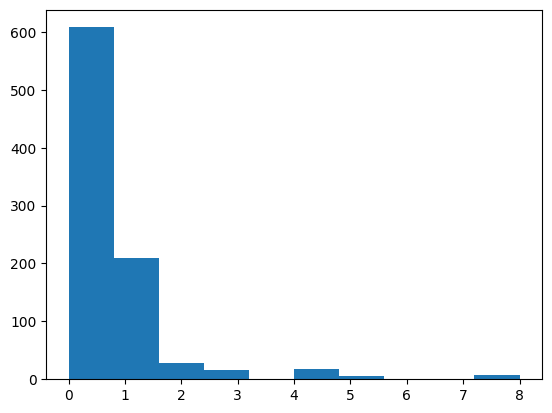

In [612]:
# Histrogram of SibSp
%matplotlib inline
plt.hist(df_train['SibSp'])


## Plotting with seaborn

**Difference between matplotlib and seborn:** "In summary, both Seaborn and Matplotlib have their strengths and weaknesses depending on your specific needs. Seaborn is great for quickly creating visually appealing plots with minimal code, while Matplotlib offers more customization options and fine-grained control over every aspect of a plot." - [New Horizons](https://www.newhorizons.com/resources/blog/how-to-choose-between-seaborn-vs-matplotlib#:~:text=In%20summary%2C%20both%20Seaborn%20and,every%20aspect%20of%20a%20plot.)

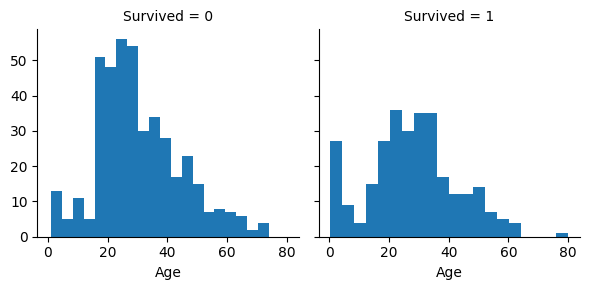

In [613]:
g = sns.FacetGrid(df_train, col='Survived', sharey=True) # Maps "Survived" into multiple axes, in this case Survived can be 0 or 1, because of this we get two axes
g.map(plt.hist, 'Age', bins=20) # One or more plot functions can be applied to each subset by calling .map(), in this case we plot histograms of "Age", one for each lable in "Survived", bins specify number of facets we divide the ages into.

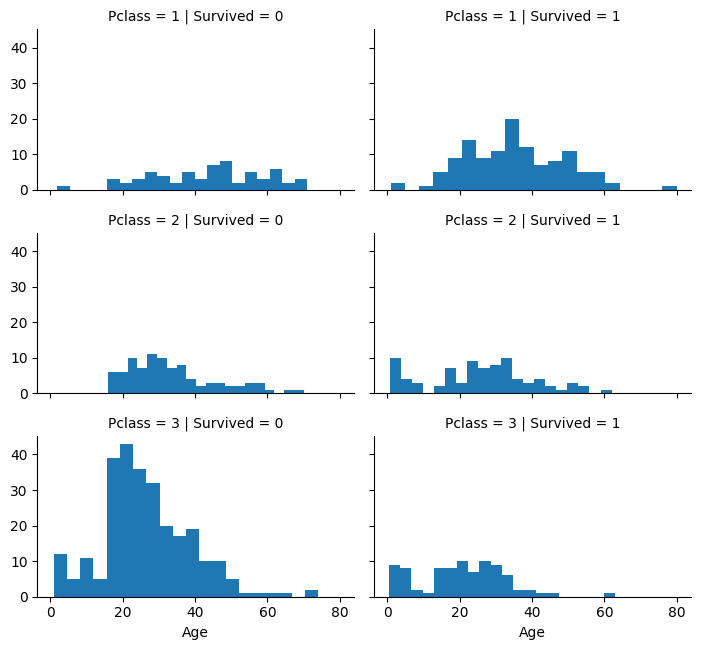

In [614]:
g = sns.FacetGrid(df_train, col='Survived', row='Pclass', height=2.2, aspect=1.6) # One axes for each possible Survived/Pclass combination
g.map(plt.hist, 'Age', alpha=1, bins=20)
g.add_legend()

In [615]:
df_train.columns

Index(['Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket',
       'Fare', 'Cabin', 'Embarked'],
      dtype='object')

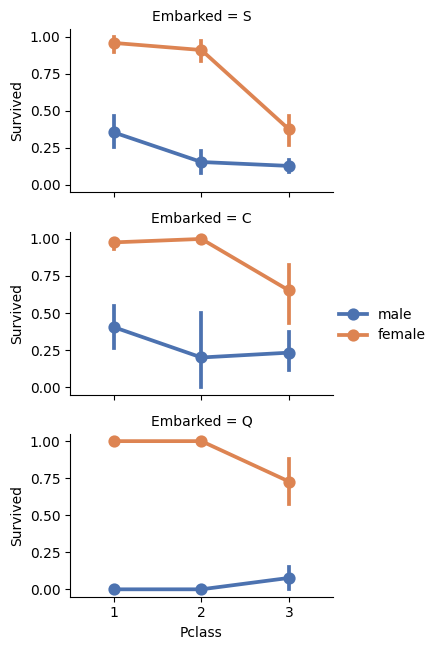

In [616]:
g = sns.FacetGrid(df_train, row='Embarked', height=2.2, aspect=1.6)
g.map(sns.pointplot, 'Pclass', 'Survived', 'Sex', palette='deep', order = [1,2,3], hue_order = ['male','female'])
g.add_legend()

In [617]:
df_train.Fare

PassengerId
1       7.2500
2      71.2833
3       7.9250
4      53.1000
5       8.0500
        ...   
887    13.0000
888    30.0000
889    23.4500
890    30.0000
891     7.7500
Name: Fare, Length: 891, dtype: float64

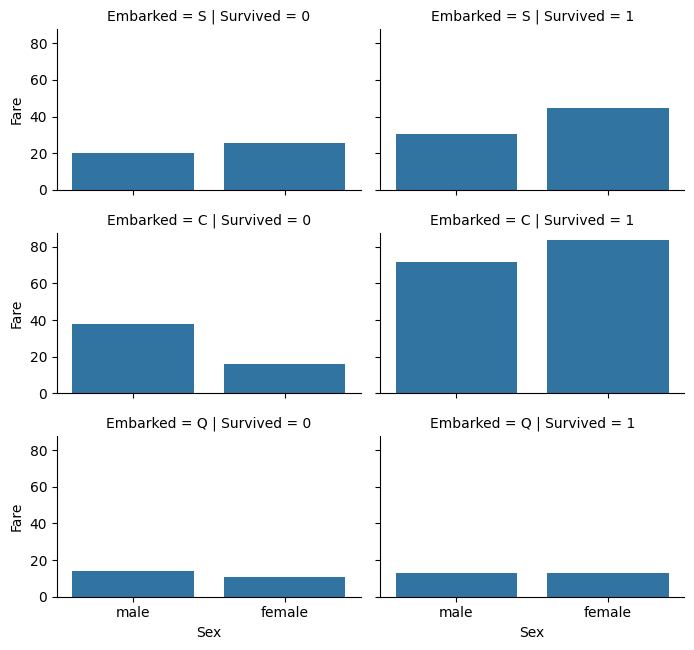

In [618]:
g = sns.FacetGrid(df_train, col='Survived',
                  row='Embarked', height=2.2, aspect=1.6)
g.map(sns.barplot, 'Sex', 'Fare', errorbar=None, order = ['male','female'])

> 🤔 **Problem 7: What conclusions can be drawn from our analysis?**
> 
> What conclusions can be drawn from our analysis so far? Look through everything you have done and think about which features seem to be of importance, and how they affect survival

# Wrangling data
In this section we will wrangle and manipulate the data to enable analysis. We will learn to drop and change features to enable efficient and accurate modelling

## Dropping features

The first step is to drop features we do not need or want. We will have to drop them from both dataframes (train and test). This can be done using the `drop()` function of a pandas dataframe. To make sure we do not make any mistakes, lets compare the shape before or after:

To ensure we apply the same principle to both datasets, but both dataframe objects in a list called `combine` with the " [ ] " operator

In [619]:
combine = [df_test, df_train]

In [620]:
# Checking shapes
for df in combine:
    print(df.shape)


(418, 10)
(891, 11)


> 🤔 **Problem 8: Drop features**
> 
> We will drop the features `Ticket` and `Cabin`. We pass a list of columns to drop to the function. 


In [621]:
?pd.DataFrame.drop

Signature:
pd.DataFrame.drop(
    self,
    labels: 'IndexLabel | None' = None,
    *,
    axis: 'Axis' = 0,
    index: 'IndexLabel | None' = None,
    columns: 'IndexLabel | None' = None,
    level: 'Level | None' = None,
    inplace: 'bool' = False,
    errors: 'IgnoreRaise' = 'raise',
) -> 'DataFrame | None'
Docstring:
Drop specified labels from rows or columns.

Remove rows or columns by specifying label names and corresponding
axis, or by directly specifying index or column names. When using a
multi-index, labels on different levels can be removed by specifying
the level. See the :ref:`user guide <advanced.shown_levels>`
for more information about the now unused levels.

Parameters
----------
labels : single label or list-like
    Index or column labels to drop. A tuple will be used as a single
    label and not treated as a list-like.
axis : {0 or 'index', 1 or 'columns'}, default 0
    Whether to drop labels from the index (0 or 'index') or
    columns (1 or 'columns').
index : 

In [622]:
# Why doesn't it work?
for df in combine:
    df.drop(['Ticket', 'Cabin'], axis=1)

When we check the shape we will see that nothing has happened to it

In [623]:
for df in combine:
    print(df.shape)

(418, 10)
(891, 11)


Nothing has happend to the shape since we created two new dataframes but never stored them anywhere. The `drop()` function returns a new dataframe. What we need to do in order to change the dataframe is to assign it to a variable or use the argument *inplace=True*. 

* However, setting inplace to True dropped the columns in the original df_train when I ran the code and therefore I would be careful using this one.

In [624]:
combine[0] = combine[0].drop(['Ticket', 'Cabin'], axis=1) 
# Here we are calling drop on the first element in the list combine, which contains the test data

In [625]:
# This code are calling drop on the first element in the list combine, which contains the train data
# However, setting inplace to True dropped the columns in the original df_train when I ran the code and therefore I would be careful using this one
# combine[1].drop(['Ticket', 'Cabin'], axis=1, inplace=True)

In [626]:
combine[1] = combine[1].drop(['Ticket', 'Cabin'], axis=1) 
# Here we are calling drop on the second element in the list combine, which contains the train data

In [627]:
for df in combine:
    print(df.shape)

(418, 8)
(891, 9)


## Creating new features

We are pretty sure the name feature contains some interesting data but it is hard to process as is. Lets try to extract the titles from it. Here we are using a regular expression, a subject which is worth a session of its own. In short, the regex here selects all text in the second word followed by a dot. 

The expand flag makes the function return a new dataframe. This is stored in our dataframe with the column header 'Name'

In [628]:
for df in combine:
    df['Title'] = df.Name.str.extract(' ([A-Za-z]+)\.', expand=False)

In [629]:
combine[0].info()

<class 'pandas.core.frame.DataFrame'>
Index: 418 entries, 892 to 1309
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    418 non-null    int64  
 1   Name      418 non-null    object 
 2   Sex       418 non-null    object 
 3   Age       332 non-null    float64
 4   SibSp     418 non-null    int64  
 5   Parch     418 non-null    int64  
 6   Fare      417 non-null    float64
 7   Embarked  418 non-null    object 
 8   Title     418 non-null    object 
dtypes: float64(2), int64(3), object(4)
memory usage: 32.7+ KB


As always, check if it worked

In [630]:
combine[1].head(15)

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,Title
PassengerId,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,S,Mr
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C,Mrs
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,S,Miss
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,S,Mrs
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,S,Mr
6,0,3,"Moran, Mr. James",male,NaN,0,0,8.4583,Q,Mr
7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,51.8625,S,Mr
8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,21.0750,S,Master
9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,11.1333,S,Mrs


> 🤔 **Problem 9: Create crosstabs**
>
> We use a `crosstab` to get an understanding for the different titles

In [631]:
?pd.crosstab

Signature:
pd.crosstab(
    index,
    columns,
    values=None,
    rownames=None,
    colnames=None,
    aggfunc=None,
    margins: 'bool' = False,
    margins_name: 'Hashable' = 'All',
    dropna: 'bool' = True,
    normalize: "bool | Literal[0, 1, 'all', 'index', 'columns']" = False,
) -> 'DataFrame'
Docstring:
Compute a simple cross tabulation of two (or more) factors.

By default, computes a frequency table of the factors unless an
array of values and an aggregation function are passed.

Parameters
----------
index : array-like, Series, or list of arrays/Series
    Values to group by in the rows.
columns : array-like, Series, or list of arrays/Series
    Values to group by in the columns.
values : array-like, optional
    Array of values to aggregate according to the factors.
    Requires `aggfunc` be specified.
rownames : sequence, default None
    If passed, must match number of row arrays passed.
colnames : sequence, default None
    If passed, must match number of column arra

In [632]:
# Create a crosstab from the df_test data using Title and Sex
pd.crosstab(combine[0]['Title'], combine[0]['Sex'])

Sex,female,male
Title,,
Col,0,2
Dona,1,0
Dr,0,1
Master,0,21
Miss,78,0
Mr,0,240
Mrs,72,0
Ms,1,0
Rev,0,2


In [633]:
# Create a crosstab from the df_train data using Title and Sex
pd.crosstab(combine[1]['Title'], combine[1]['Sex'])

Sex,female,male
Title,,
Capt,0,1
Col,0,2
Countess,1,0
Don,0,1
Dr,1,6
Jonkheer,0,1
Lady,1,0
Major,0,2
Master,0,40


We replace the less frequent titles with 'Rare'. For both datasets, replace the below titles with the title in the comment. 

In [634]:
# Replace with "Rare"
less_frequent_titles =['Lady', 'Countess','Capt', 'Col',
                       'Don', 'Dr', 'Major', 'Rev', 'Sir', 
                       'Jonkheer', 'Dona']

# Replace with Miss
miss_replace = ['Mlle', 'Ms']

# Replace with Mrs
mrs_replace = 'Mme'

In [635]:
?pd.DataFrame.replace

Signature:
pd.DataFrame.replace(
    self,
    to_replace=None,
    value=<no_default>,
    *,
    inplace: 'bool_t' = False,
    limit: 'int | None' = None,
    regex: 'bool_t' = False,
    method: "Literal['pad', 'ffill', 'bfill'] | lib.NoDefault" = <no_default>,
) -> 'Self | None'
Docstring:
Replace values given in `to_replace` with `value`.

Values of the Series/DataFrame are replaced with other values dynamically.
This differs from updating with ``.loc`` or ``.iloc``, which require
you to specify a location to update with some value.

Parameters
----------
to_replace : str, regex, list, dict, Series, int, float, or None
    How to find the values that will be replaced.

    * numeric, str or regex:

        - numeric: numeric values equal to `to_replace` will be
          replaced with `value`
        - str: string exactly matching `to_replace` will be replaced
          with `value`
        - regex: regexs matching `to_replace` will be replaced with
          `value`

    * list 

> 🤔 **Problem 10: Perfom the replacements**
>
> Complete the codeblock below to perform the replacements above and get the survival mean for the different titles.

In [636]:
for df in combine:
    df['Title'] = df['Title'].replace(less_frequent_titles, 'Rare')
    df['Title'] = df['Title'].replace(miss_replace, 'Miss')
    df['Title'] = df['Title'].replace(mrs_replace, 'Mrs')
    
combine[1][['Title', 'Survived']].groupby(['Title'], as_index=False).mean()

,Title,Survived
0,Master,0.575000
1,Miss,0.702703
2,Mr,0.156673
3,Mrs,0.793651
4,Rare,0.347826


## Converting feature type

Many models have a problem with categorical data. We can convert it into ordinal. However, be careful that the model you are using is not considering it numerical data. 

In [637]:
title_mapping = {"Mr": 1, "Miss": 2, "Mrs": 3, "Master": 4, "Rare": 5}
for dataset in combine:
    dataset['Title'] = dataset['Title'].map(title_mapping)
    dataset['Title'] = dataset['Title'].fillna(0)

If you are not careful with which model you are using, many models would consider the title "Mrs" as being three times as much title as "Mr" which is of course nonsense. This is still categorical data.

In [638]:
combine[0]

,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,Title
PassengerId,,,,,,,,,
892,3,"Kelly, Mr. James",male,34.5,0,0,7.8292,Q,1
893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,7.0000,S,3
894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,9.6875,Q,1
895,3,"Wirz, Mr. Albert",male,27.0,0,0,8.6625,S,1
896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,12.2875,S,3
...,...,...,...,...,...,...,...,...,...
1305,3,"Spector, Mr. Woolf",male,NaN,0,0,8.0500,S,1
1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,108.9000,C,5
1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,7.2500,S,1


Let's drop the name

In [639]:
for df in combine:
    df.drop(['Name'], axis=1, inplace=True)

> 🤔 **Problem 11: Convert the sex feature into a categorical feature**
>
> Let's convert the sex feature into a new categorical feature

In [640]:
gender_map = {'female':1,'male':0}
for df in combine:
    df['Sex']= df['Sex'].map(gender_map).astype(int)


In [641]:
combine[0].head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
PassengerId,,,,,,,,
892,3,0,34.5,0,0,7.8292,Q,1
893,3,1,47.0,1,0,7.0000,S,3
894,2,0,62.0,0,0,9.6875,Q,1
895,3,0,27.0,0,0,8.6625,S,1
896,3,1,22.0,1,1,12.2875,S,3


## Completing features

If we examine NaN values (missing values) for each feature using the code block below, we note that a lot of values are missing for age. Consequentially we can either:

* Drop all examples in the data with NaN values for any feature
* Make an estimated guess to complete the "Age" feature in our dataset

In [642]:
for index, df in enumerate(combine):
    for feature in df.columns:
        number_of_rows_with_na = len(df[df[feature].isna()])
        if number_of_rows_with_na != 0:
            print(f'{number_of_rows_with_na} NaN rows out of {len(df)} for feature "{feature}" in {"test" if index == 1 else "train"}.')

86 NaN rows out of 418 for feature "Age" in train.
1 NaN rows out of 418 for feature "Fare" in train.
177 NaN rows out of 891 for feature "Age" in test.
2 NaN rows out of 891 for feature "Embarked" in test.


Lets see how Age correlates with Sex and Pclass to make an educated guess on the missing Age-values

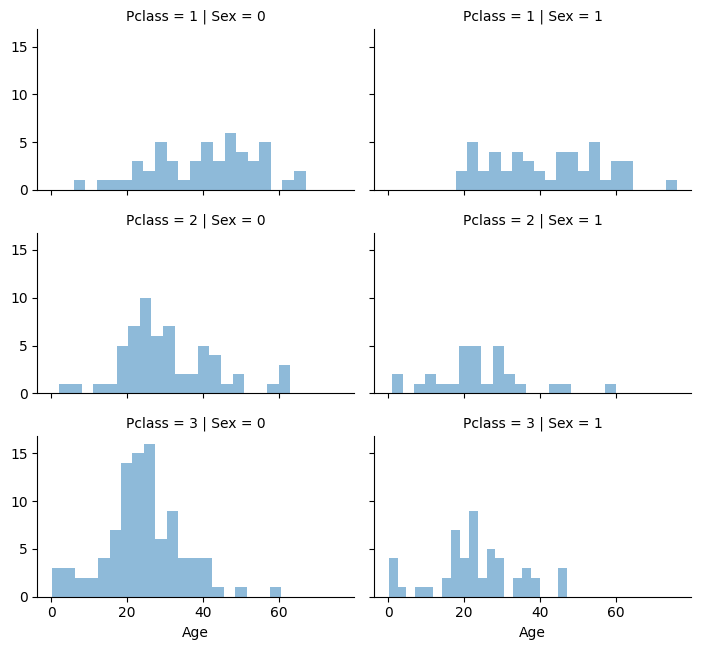

In [643]:
grid = sns.FacetGrid(combine[0], row='Pclass', col='Sex', height=2.2, aspect=1.6)
grid.map(plt.hist, 'Age', alpha=.5, bins=20)
grid.add_legend()

Let's make one guess for each combination of Pclass and Sex

In [644]:
guess_ages = np.zeros((2,3))
guess_ages

array([[0., 0., 0.],
       [0., 0., 0.]])

In [645]:
# Loop over the test and train dataframes
for df in combine:
    # Loop over all possible Sex and Pclass combination
    for i in range(0, 2): # Sex
        for j in range(0, 3): # Pclass
            # Save all ages for the given Sex/Pclass combination (drop N/A)
            guess_df = df[(df['Sex'] == i) & (df['Pclass'] == j+1)]['Age'].dropna()

            # Our guess is that the age of a all samples with a missing age for a given Sex/Pclass combination is the median age 
            guess_ages[i,j] = guess_df.median() 

    # Loop over all possible Sex and Pclass combinations        
    for i in range(0, 2):
        for j in range(0, 3):
            # 
            df.loc[ (df.Age.isnull()) & (df.Sex == i) & (df.Pclass == j+1),'Age'] = guess_ages[i,j]

    df['Age'] = df['Age'].astype(int)

Now let's check if NaN rows remain for "Age"

In [646]:
for index, df in enumerate(combine):
    for feature in df.columns:
        number_of_rows_with_na = len(df[df[feature].isna()])
        if number_of_rows_with_na != 0:
            print(f'{number_of_rows_with_na} NaN rows out of {len(df)} for feature "{feature}" in {"test" if index == 1 else "train"}.')

1 NaN rows out of 418 for feature "Fare" in train.
2 NaN rows out of 891 for feature "Embarked" in test.


Since is only a few rows left in train and test with one missing value we drop these rows

In [647]:
combine[0] = combine[0].dropna().copy()
combine[1] = combine[1].dropna().copy()

# Bonus: Support Vector Machines in Scikit learn

Import necessary libraries

In [648]:
from sklearn import svm
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.decomposition import PCA


## Ensure all features are numerical

In [649]:
combine[1].info()

<class 'pandas.core.frame.DataFrame'>
Index: 889 entries, 1 to 891
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  889 non-null    int64  
 1   Pclass    889 non-null    int64  
 2   Sex       889 non-null    int64  
 3   Age       889 non-null    int64  
 4   SibSp     889 non-null    int64  
 5   Parch     889 non-null    int64  
 6   Fare      889 non-null    float64
 7   Embarked  889 non-null    object 
 8   Title     889 non-null    int64  
dtypes: float64(1), int64(7), object(1)
memory usage: 69.5+ KB


In [650]:
embarked_map = {'C':0,'Q':1, 'S':2}
for df in combine:
    df['Embarked']= df['Embarked'].map(embarked_map).astype(int)

In [651]:
combine[1].info()

<class 'pandas.core.frame.DataFrame'>
Index: 889 entries, 1 to 891
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  889 non-null    int64  
 1   Pclass    889 non-null    int64  
 2   Sex       889 non-null    int64  
 3   Age       889 non-null    int64  
 4   SibSp     889 non-null    int64  
 5   Parch     889 non-null    int64  
 6   Fare      889 non-null    float64
 7   Embarked  889 non-null    int64  
 8   Title     889 non-null    int64  
dtypes: float64(1), int64(8)
memory usage: 69.5 KB


## Divide the df into X and y

In [652]:
X_train_unscaled = combine[1].loc[:, combine[1].columns != 'Survived']
y_train = combine[1]['Survived']
X_test_unscaled = combine[0]

## Scale the features

In [653]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train_unscaled)
X_test = sc.transform(X_test_unscaled)

## Fit a SVM

In [654]:
clf = svm.SVC(kernel='linear')
clf.fit(X_train, y_train)

SVC(kernel='linear')

## Predict test data survival

Unfortunately the dataset does not contain any informaiton about the true survival labels in the test data so we cannot validate how "good" our SVM is.

In [655]:
clf.predict(X_test)

array([0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0,
       0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1,
       0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0,
       1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0,
       0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0,
       0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0,

## Examine feature importance

If we use a linear kernel, we can examine the coefficients to understand which features have the most influence on the decision boundary.

In [656]:
X_train_unscaled.columns.to_list()

['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked', 'Title']

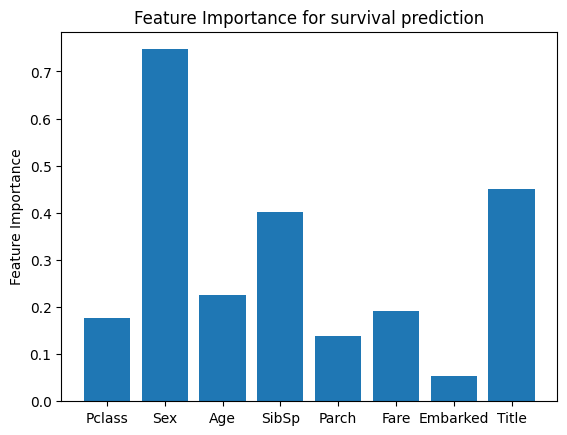

In [657]:
feature_importance = abs(clf.coef_[0])
plt.bar(X_train_unscaled.columns.to_list(), feature_importance)
plt.ylabel("Feature Importance")
plt.title("Feature Importance for survival prediction")
plt.show()

## Confusion matrix for training data

Ideally you want to look at the confusion matrix for the test data as well but since the dataset is lacking the true survival labels we can only examine the train data.

In [658]:
print(f'{sum(clf.predict(X_train) == y_train) / len(y_train) * 100:.2f}% of the training examples are predicted correct using our SVM.')

81.33% of the training examples are predicted correct using our SVM.


However, if we examine the confusion matrix for the training data we note that the dataset is very unbalanced. 

* Only a small number of true labels are "Survival=1". 

* Meaning that if our model where to predict "Survival=0" in all cases the precision would be 84.38% (470/557), suggesting that this very simple SVM is note very good at predciting survival. 

* As a measure to cope with this we could specify class weights but I did that very quickly and did not get better results.

* The adjustments we can make are more or loss endless and we can choose a different model to predict survival

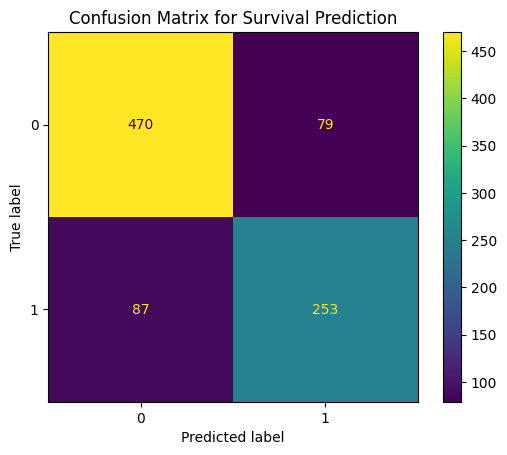

In [659]:
y_pred = clf.predict(X_train)
ConfusionMatrixDisplay.from_predictions(y_train, y_pred)
plt.title("Confusion Matrix for Survival Prediction")
plt.show()

## Principal Component Analysis (PCA)

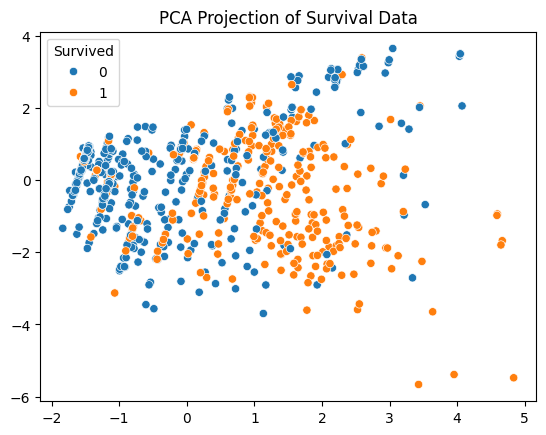

In [660]:
pca = PCA(n_components=2)
X_reduced = pca.fit_transform(X_train)

sns.scatterplot(x=X_reduced[:, 0], y=X_reduced[:, 1], hue=y_train)
plt.title("PCA Projection of Survival Data")
plt.show()

In [661]:
# Explained variance
print("Explained Variance of each component:", pca.explained_variance_, '\n')

# Explained variance ratio
print("Explained Variance Ratio of each component:", pca.explained_variance_ratio_, '\n')

# PCA Components (Eigenvectors)
print("PCA Components (Eigenvectors):")
print(pca.components_, '\n')

# Singular values
print("Singular values of each component:", pca.singular_values_, '\n')

Explained Variance of each component: [2.17475024 1.81936516] 

Explained Variance Ratio of each component: [0.27153799 0.22716483] 

PCA Components (Eigenvectors):
[[-0.26344869  0.44568177 -0.08761029  0.35449725  0.4288595   0.39490861
  -0.1446878   0.48765853]
 [ 0.57886216  0.04474863 -0.52258217  0.33108603  0.25398409 -0.37725888
   0.25378196  0.09470276]] 

Singular values of each component: [43.94517282 40.19448045] 

